# INIT

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

# Basic Gradient Descent

In [ ]:
def f(y):
    return pow(y, 4) - 2*pow(y, 2) + y
def g(y):
    return 4*pow(y, 3) - 4*y + 1

x = 10
alpha = 0.01
epsilon = 0.00000001
a = np.arange(-10, 10, 0.1)

plt.plot(a, f(a))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Gradient Descent")
while True:
    xn = x - alpha*g(x)
    if abs(x - xn) < epsilon:
        break
    else:
        x = xn
    plt.plot(xn, f(xn), 'b*')

print(x)
plt.show()

# Experiments with Gradient Descent

## Large X

In [ ]:
def f(x):
    return 3*pow(x, 2) - 7*x + 5

def g(x):
    return 6*x - 7

x = 12
alpha = 0.1
epsilon = 0.00000001
a = np.arange(-10, 10, 1)

plt.plot(a, f(a))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Gradient Descent")
while True:
    xn = x - alpha*g(x)
    if abs(x - xn) < epsilon:
        break
    else:
        x = xn
    plt.plot(xn, f(xn), 'b*')

print(x)
plt.show()

## More than 2 Local Minimum

In [ ]:

def f(y):
    return pow(y, 4) - 2*pow(y, 2) + y
def g(y):
    return 4*pow(y, 3) - 4*y + 1

x = -2.0
alpha = 0.001
epsilon = 0.00000001
a = np.arange(-2, 2, 0.1)

plt.plot(a, f(a))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Gradient Descent")
while True:
    xn = x - alpha*g(x)
    if abs(x - xn) < epsilon:
        break
    else:
        x = xn
    plt.plot(xn, f(xn), 'b*')

print(x)
plt.show()

## Maximum Local Points

In [ ]:
def f(y):
    return pow(y, 4) - 2*pow(y, 2) + y
def g(y):
    return 4*pow(y, 3) - 4*y + 1

x = 10
alpha = 0.01
epsilon = 0.00000001
a = np.arange(-10, 10, 0.1)

plt.plot(a, f(a))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Gradient Descent")
while True:
    xn = x + alpha*g(x) # Replace Minus With Plus
    if abs(x - xn) < epsilon:
        break
    else:
        x = xn
    plt.plot(xn, f(xn), 'b*')

print(x)
plt.show()

# Linear Regression using Gradient Descent

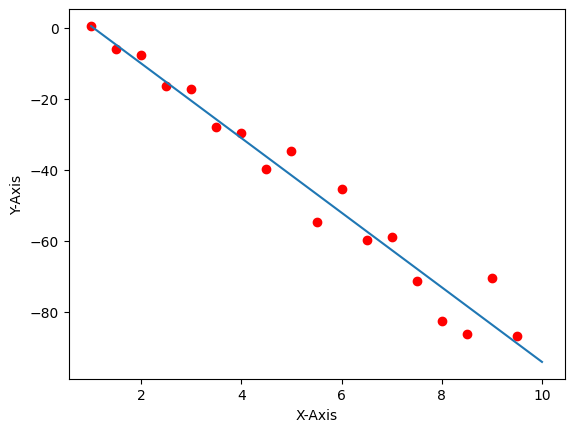

10.978787500770911
-10.515338579524622


In [10]:
x = np.arange(1, 10, 0.5)
y = -9*x + 4 + np.random.normal(0, 6, x.shape)
a = np.array([147, 150, 153, 158, 163, 168, 170, 173, 175, 178, 180, 183], dtype = np.float64).T
b = np.array([49, 50, 51, 54, 58, 60, 62, 63, 64, 66, 67, 68], dtype = np.float64).T

min_theta0 = 0
min_theta1 = 0
alpha = 0.01
epsilon = 0.000001
theta0_random = 10
theta1_random = 10
while True:
    theta0_random = theta0_random - alpha*np.mean(theta1_random*x + theta0_random - y)
    theta1_random = theta1_random - alpha*np.mean((theta1_random*x + theta0_random - y)*x)
    if (abs(np.mean(theta1_random*x + theta0_random - y)) + abs(np.mean(theta1_random*x + theta0_random - y)*x) < epsilon).all():
        min_theta0 = theta0_random
        min_theta1 = theta1_random
        break

plt.plot(x, y, 'ro')
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.plot([1, 10], [min_theta0 + 1*min_theta1, min_theta0 + 10*min_theta1])
plt.show()
print(min_theta0)
print(min_theta1)

## Using Framework

In [9]:

class MyModel:
  # constructor
  def __init__(self):
    return None

  # Implement architecture of the model
  def build(self, input_dim):
    myInput = Input(shape = (input_dim,))
    myOutput = Dense(units=1, activation = None)(myInput)
    self.model = Model(myInput, myOutput)
    return self.model
  # Train the defined model with training and validation data
  def train(self, x_train, y_train, epochs_input):
    opt = tf.keras.optimizers.SGD(learning_rate = 0.01)
    self.model.compile(optimizer=opt, loss='mse')
    return self.model.fit(x_train, y_train, epochs = epochs_input)
  # Save the trained model to file
  def save(self, model_path):
    return None

  # Load pretrained model from file
  def load(self):
    return None
  # Visualize your model
  def summary(self):
    return None

  # Apply your model with new input data
  def predict(self):
    return None
H = np.array([147, 150, 153, 158, 163, 168, 170, 173, 175, 178, 180, 183], dtype = np.float64).T
W = np.array([49, 50, 51, 54, 58, 60, 62, 63, 64, 66, 67, 68], dtype = np.float64).T

x = np.arange(-5, 5, 0.5)
std = 2 # tham số thể hiện mức độ NHIỄU nhiều hay ít
y = -3*x + 10 + np.random.normal(0, std, len(x))  # Kỳ vọng các biến theta trả về theta = [[10],[-3]]

a = np.array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. , 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])
b = np.array([25.40729498, 25.29574425, 23.90521496, 20.30689771, 19.39317867,
       13.14535337, 17.45262087,  9.96358651, 14.85946008, 11.07613586,
       10.84981277,  9.82826791,  8.5280891 ,  1.5692666 ,  2.43431479,
       -0.92917028, -0.33752305, -2.52360409, -6.00860186, -5.92781816])

lin_reg = MyModel()
lin_reg.build(1)
lin_reg.train(a, b, 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 3526.4219
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1089088384.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 336906495721472.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 104221079919677931520.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 32240502174853688855625728.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9973507447832172311375083732992.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3085276483967877041750357083217199104.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: inf
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: inf
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: inf
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: inf
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: inf
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: inf
Epoch 14/100
1/1 ━━━━━━━━━━━━━━